In [6]:
%run calFeatureFunctions.ipynb 
%run distribution.ipynb 
%run datasets.ipynb

In [115]:

class config:
    source = {
    'location': 'syf',
    'action': 'jump',
    'humanId': ['A'],
    'distance': ['4.0']
    }
    target = {
    'location': 'syf',
    'action': 'jump',
    'humanId': ['B'],
    'distance': ['4.0']
    }
class analysis:
    def __init__():
        pass
    
    @staticmethod
    def plt_diff(source, target, feature, plot=True, metric='mmd'):
        import matplotlib.pyplot as plt
        def load_data(config_dict):
            data = datasets.load(location = config_dict['location'], action = config_dict['action'], 
                                 humanId = config_dict['humanId'], distance = config_dict['distance'])
            data = datasets.preprocess(data)
            comp_acc = []
            for values in data.values():
                for value in values:
                    comp_acc.append(time_feats.compositionAcc(value))
            return comp_acc
        def load_feats(data, feature):

            feats = []
            if feature == 'std':
                for i in data:
                    feats.append(time_feats.std(i))
            if feature == 'wpd_energy':
                for i in data:
                    feats.append(freq_feats.wpd_energy(i, 3))
            print(len(feats))
            return feats
        def plot_feats(source_feats, target_feats):
            import matplotlib.pyplot as plt
            plt.figure(figsize=(15, 10))
            plt.subplot(2, 1, 1)
            plt.title('{}_{}'.format(source['location'], feature))
            plt.hist(source_feats)
            plt.subplot(2, 1, 2)
            plt.title('{}_{}'.format(target['location'], feature))
            plt.hist(target_feats)
        def plot_data(data):
            for i in data:
                plt.figure(figsize = (10, 5))
                plt.plot(i)
            
        source_data = load_data(source)
        target_data = load_data(target)
        source_feats, target_feats = [], []
        
        source_feats = load_feats(source_data, feature)
        target_feats = load_feats(target_data, feature)
        if plot:
            plot_feats(source_feats, target_feats)
        diff = 0
        if metric == 'mmd':
            diff = distribution.mmd_rbf(source_feats, target_feats).item()
#         print(source_feats, target_feats)
#         plot_data(source_data)
#         print("###################################")
#         plot_data(target_data)
        return source_feats, target_feats, diff
#         return diff

103
86


1.0059539930597938

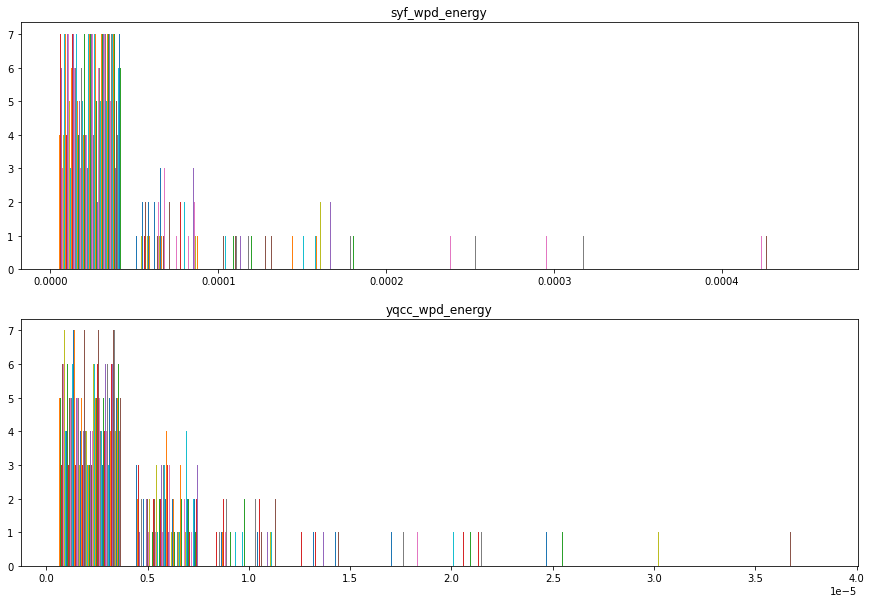

In [14]:
analysis.plt_diff(config.source, config.target, 'wpd_energy')

96
100
2.5920714203615236
52
100
2.244254609605816
56
102
0.2429713953202941
46
92
0.4725501892229329
45
82
0.4693235353880363


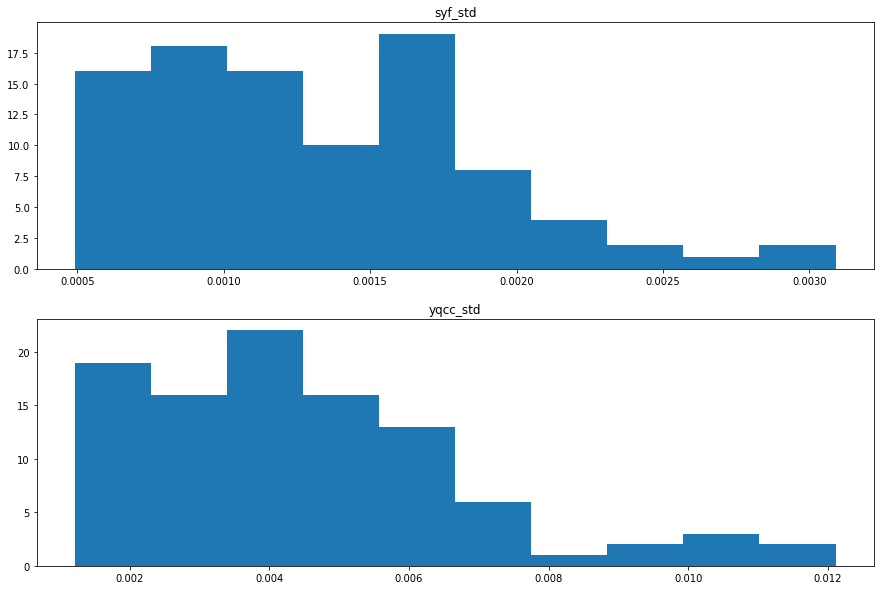

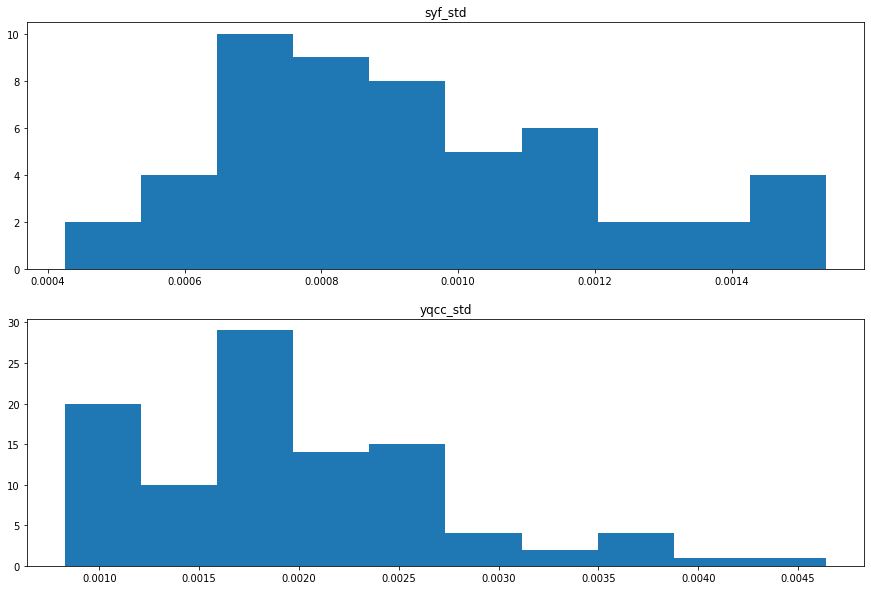

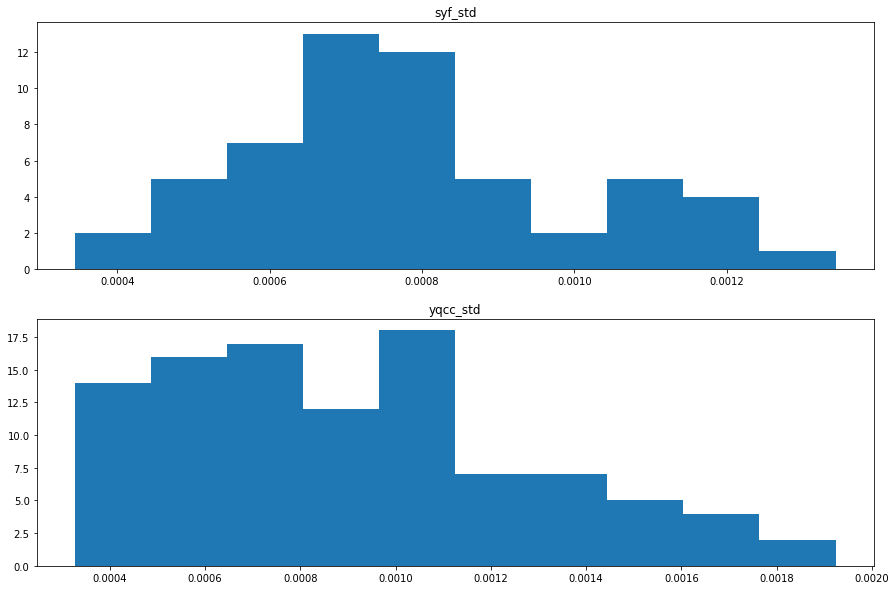

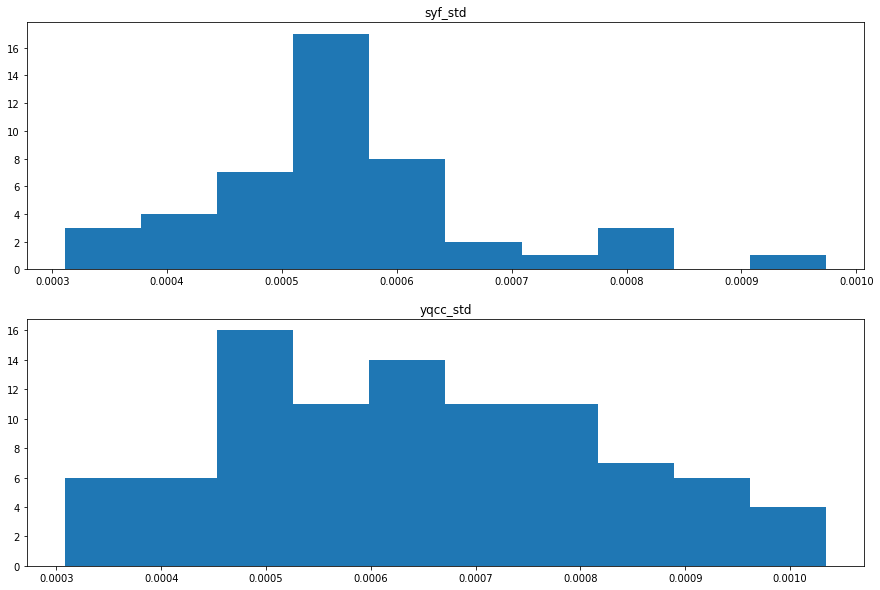

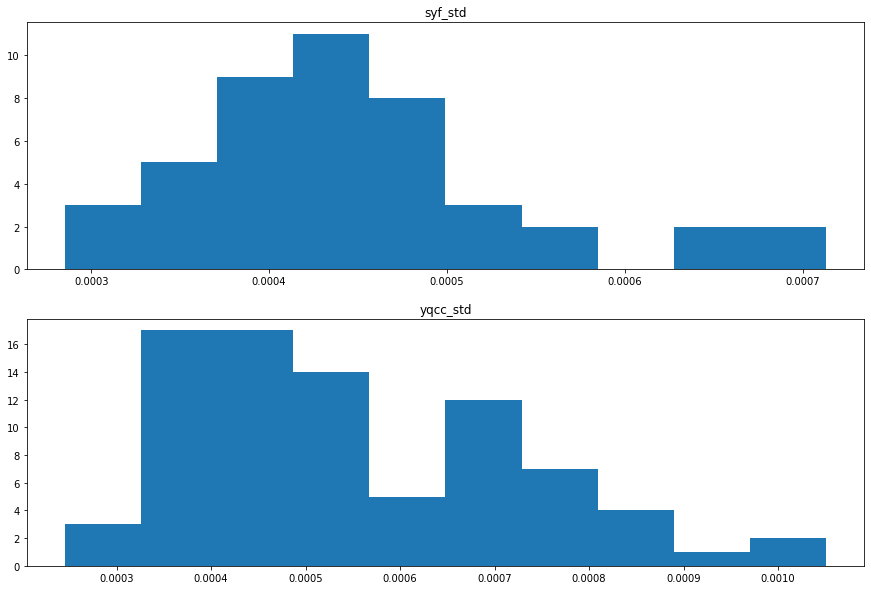

In [64]:
# 在各点处距离差异
for i in ['1.0', '2.0', '3.0', '4.0', '5.0']:
    config.source['distance'], config.target['distance'] = i, i
#     if i == '5.0':
#         config.target['humanId'] = ['A','B','C','D','E']
    print(analysis.plt_diff(config.source, config.target, 'std')[2])

In [15]:
d = np.random.normal(loc=0,scale=1,size=200) 
y = np.random.normal(loc=0,scale=1,size=250) 

In [16]:
distribution.mmd_rbf(d, y)

tensor(0.0106, dtype=torch.float64)

51
45
[(1, 27), (2, 11), (0, 7), (3, 4), (4, 1), (5, 1)]
[(2, 18), (1, 16), (3, 5), (0, 4), (4, 2)]
0 tensor(0.5776, dtype=torch.float64)
6 tensor(1.9520, dtype=torch.float64)
12 tensor(1.8279, dtype=torch.float64)
18 tensor(1.0424, dtype=torch.float64)
24 tensor(0.5058, dtype=torch.float64)
30 tensor(0.2059, dtype=torch.float64)
36 tensor(0.3673, dtype=torch.float64)
42 tensor(0.6538, dtype=torch.float64)


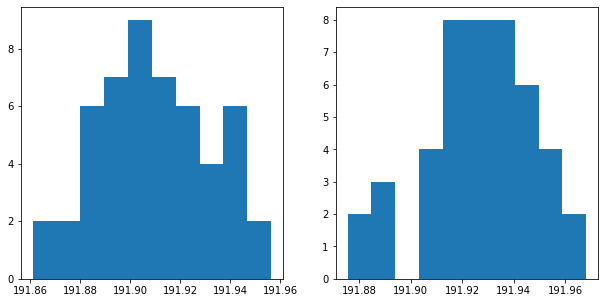

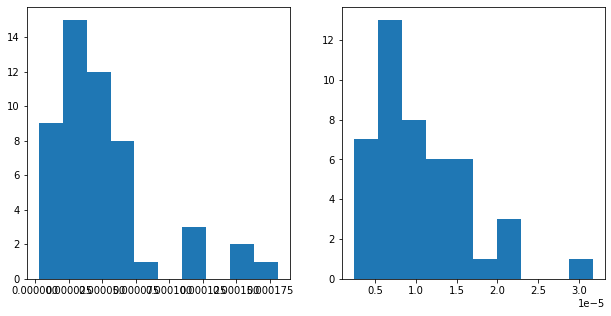

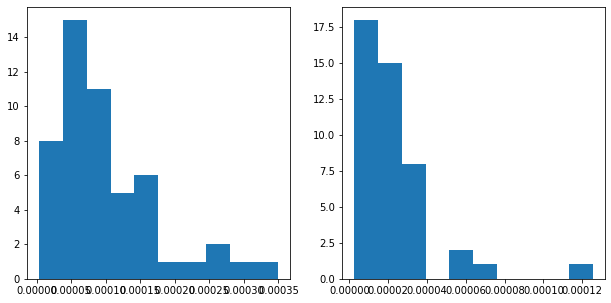

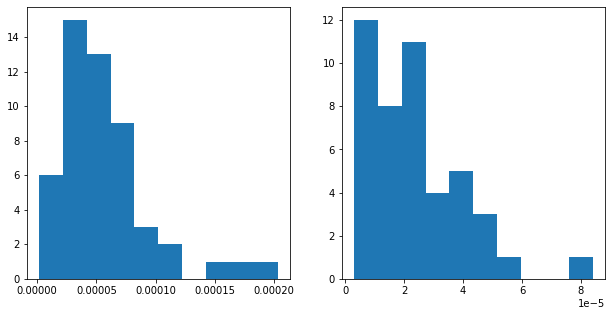

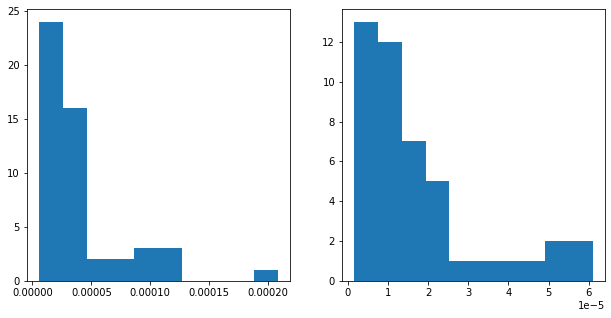

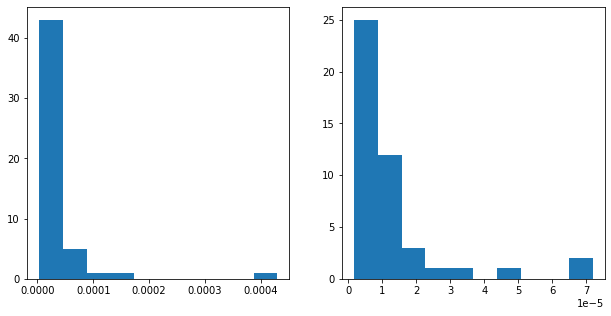

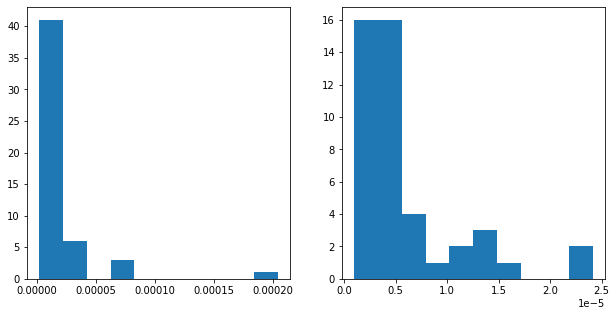

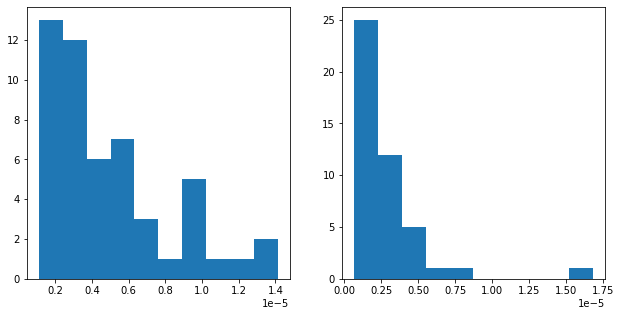

In [117]:
# 分析不同土质dig在各个频段的能量差异
import matplotlib.pyplot as plt
for i in ['1.0']:
   
    config.source['distance'], config.target['distance'] = i, i
#     if i == '5.0':
#         config.target['humanId'] = ['A','B','C','D','E']   
    source_feats, target_feats,_ = analysis.plt_diff(config.source, config.target, 'wpd_energy',plot=False)

    a = np.argmax(np.array(source_feats)[:, 1:], axis = 1)
    b = np.argmax(np.array(target_feats)[:, 1:], axis = 1)
    unique,count=np.unique(a,return_counts=True)
    data_count_a=dict(zip(unique,count))
    unique,count=np.unique(b,return_counts=True)
    data_count_b=dict(zip(unique,count))
    data_count_a = sorted(data_count_a.items(), key = lambda d: d[1], reverse=True)
    data_count_b = sorted(data_count_b.items(), key = lambda d: d[1], reverse=True)

    print(data_count_a)
    print(data_count_b)
    for i in range(0, 8):
        plt.figure(figsize = (16, 5))
        plt.subplot(1, 3, 1)
        plt.hist(np.array(source_feats)[:,i])
        plt.subplot(1, 3, 2)
        plt.hist(np.array(target_feats)[:,i])
#         plt.subplot(1, 3, 3)
        print(i*6, distribution.mmd_rbf(np.array(source_feats)[:,i], np.array(target_feats)[:,i]))
#         print(np.array(source_feats)[:,i])
#         print(np.array(target_feats)[:,i])